In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
import pandas as pd 
data = pd.read_csv("parkinsons.csv") 
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
x= data.drop(columns=['status', 'name'])
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
y= data['status']
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [7]:
x_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
143,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,...,0.01506,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
105,149.689,160.368,133.608,0.00257,0.00002,0.00116,0.00134,0.00349,0.01346,0.126,...,0.01059,0.01979,0.00578,27.421,0.365488,0.719974,-6.997403,0.210279,1.994387,0.112878
118,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01151,0.01851,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
180,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,0.237,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,206.327,226.355,92.020,0.00495,0.00002,0.00302,0.00246,0.00905,0.02105,0.209,...,0.01604,0.03320,0.01048,21.864,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
26,171.041,208.313,75.501,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,0.186,...,0.01872,0.02666,0.01095,25.908,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
60,209.144,237.494,109.379,0.00282,0.00001,0.00147,0.00152,0.00442,0.01861,0.170,...,0.01382,0.02925,0.00871,25.554,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
31,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


In [8]:

x_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
167,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
194,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
99,126.512,141.756,99.770,0.01936,0.000150,0.01159,0.00990,0.03476,0.06734,0.659,...,0.05783,0.10833,0.16744,12.435,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
142,198.458,219.290,148.691,0.00376,0.000020,0.00182,0.00215,0.00546,0.03527,0.297,...,0.02530,0.06165,0.01728,18.702,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
71,136.358,176.595,65.750,0.00971,0.000070,0.00534,0.00478,0.01601,0.04978,0.483,...,0.03736,0.08247,0.03361,18.570,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
115,151.872,492.892,69.085,0.00856,0.000060,0.00404,0.00385,0.01211,0.01843,0.235,...,0.01271,0.02389,0.06051,23.693,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
149,202.632,565.740,177.258,0.01627,0.000080,0.00919,0.00963,0.02756,0.07170,0.833,...,0.06460,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
23,173.917,192.735,86.180,0.00476,0.000030,0.00221,0.00258,0.00663,0.04192,0.364,...,0.03772,0.06562,0.01840,20.422,0.537264,0.686894,-5.248776,0.210279,2.547508,0.253556


In [9]:
y_train

143    1
105    1
118    1
180    1
191    0
      ..
114    1
26     1
60     0
31     0
30     0
Name: status, Length: 156, dtype: int64

In [10]:
y_test

167    0
194    0
99     1
142    1
71     1
115    1
149    1
32     0
8      1
23     1
15     1
157    1
121    1
117    1
34     0
173    0
81     1
7      1
9      1
78     1
166    0
131    1
45     0
192    0
62     0
84     1
14     1
106    1
93     1
136    1
91     1
174    0
22     1
154    1
123    1
128    1
120    1
94     1
33     0
Name: status, dtype: int64

In [11]:
decision_tree_algorithm= DecisionTreeClassifier()
decision_tree_algorithm.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
decision_tree_prediction = decision_tree_algorithm.predict(x_test)
decision_tree_prediction

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
dtree_cm=confusion_matrix(y_test, decision_tree_prediction)
decision_tree_accuracy= accuracy_score(y_test, decision_tree_prediction)
decision_tree_accuracy

0.8461538461538461

In [14]:
random_forest_algorithm= RandomForestClassifier()
random_forest_algorithm.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
random_forest_prediction = random_forest_algorithm.predict(x_test)
random_forest_prediction

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [16]:
rdf_cm=confusion_matrix(y_test, random_forest_prediction)
random_forest_accuracy= accuracy_score(y_test, random_forest_prediction)
random_forest_accuracy

0.9230769230769231

In [17]:
k_neighbors_algorithm=  KNeighborsClassifier()
k_neighbors_algorithm.fit(x_train,y_train) 

KNeighborsClassifier()

In [18]:
k_neighbors_prediction = k_neighbors_algorithm.predict(x_test)
k_neighbors_prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [19]:
knn_cm=confusion_matrix(y_test,k_neighbors_prediction)
k_neighbors_accuracy= accuracy_score(y_test, k_neighbors_prediction)
k_neighbors_accuracy

0.8974358974358975

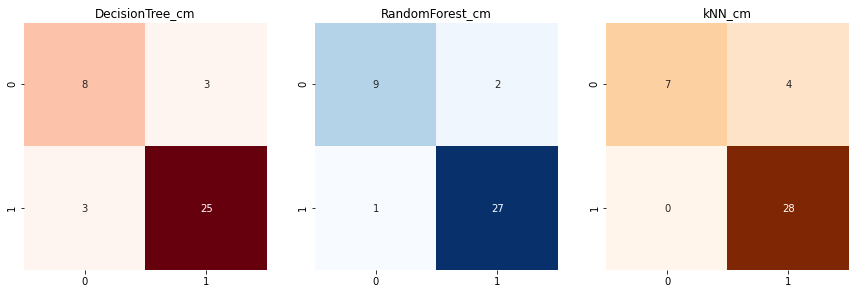

In [20]:
plt.figure(figsize=(20,10))


plt.subplot(2,4,1)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("RandomForest_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,3)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.show()

Text(0.5, 1.0, 'Model Accracy')

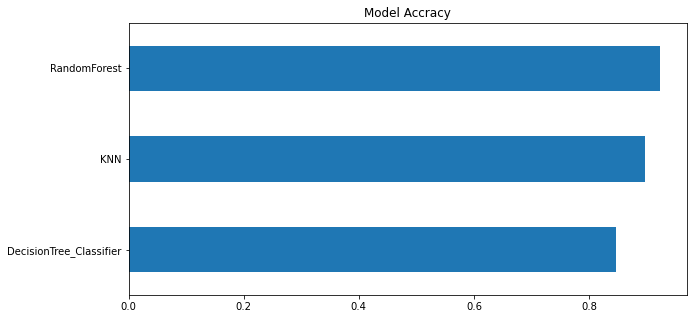

In [21]:
model_accuracy = pd.Series(data=[random_forest_accuracy,k_neighbors_accuracy,decision_tree_accuracy], 
index=['RandomForest','KNN','DecisionTree_Classifier'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

In [22]:
#RandomForest
print("Random Forest Accuracy:\t \n")
print(classification_report(y_test, random_forest_prediction))

# DecisionTree Classifier
print("Decision Tree Accuracy:\t \n")
print(classification_report(y_test, decision_tree_prediction))


#KNN
print("KNN Accuracy:\t \n")
print(classification_report(y_test,k_neighbors_prediction))

Random Forest Accuracy:	 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.93      0.96      0.95        28

    accuracy                           0.92        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.92      0.92      0.92        39

Decision Tree Accuracy:	 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.89      0.89      0.89        28

    accuracy                           0.85        39
   macro avg       0.81      0.81      0.81        39
weighted avg       0.85      0.85      0.85        39

KNN Accuracy:	 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.88      1.00      0.93        28

    accuracy                           0.90        39
   macro avg       0.94      0.82      0.86        39
wei